# Novice to Grandmaster - What Data Scientists say?

Copied from https://www.kaggle.com/ash316/novice-to-grandmaster

Kaggle is the world's largest Data Science platform with more than 1 million users, and it is an excellent platform for students like me to learn and grow in the field of Data Science and Machine Learning. It has users from various domains,like statisticians,Data Scientists and Machine Learning Practitioners.This dataset published by Kaggle is a gem for people like me, who like to analyse and investigate data. In this notebook, we will try to find some trending or some common questions, each budding data scientist would like to know, like the most used tools, the resources to learn data science ,etc.

The biggest problem that we might face is fake and bogus responses. As it is a survey, not everyone will answer with proper credentials, and thus I assume that there will be a lot many outlier. Let's dive in straight into the pool of data and gain some insights..

## Introduction
### Who are Data Scientists?

A data scientist is a statistician or a programmer, who cleans, manages and organizes data, perform descriptive statistics and analysis to develop insights,build predictive models and solve business related problems. Let's see what do Data Scientists on kaggle say..

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
plt.style.use('fivethirtyeight')
import warnings
# warnings.filterwarnings('ignore')
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import base64
import io
# from scipy.misc import imread
import codecs
from IPython.display import HTML
from matplotlib_venn import venn2
from subprocess import check_output
print(check_output(['ls', 'Data']).decode('utf8'))

conversionRates.csv
freeformResponses.csv
multipleChoiceResponses.csv
schema.csv



In [9]:
response = pd.read_csv('Data/multipleChoiceResponses.csv', encoding='ISO-8859-1')

/home/user/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning:

Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types.Specify dtype option on import or set low_memory=False.



In [11]:
response.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
print(response.columns)

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)


# Some Basic Analysis

In [13]:
print('The total number of respondents:', response.shape[0])
print('Total number of countries with respondents:', response['Country'].nunique())
print('Country with highest respondents:', 
      response['Country'].value_counts().index[0], 'with', 
      response['Country'].value_counts().values[0], 'respondents')
print('Yongest respondent:', response['Age'].min(), ' and Oldest respondent:', response['Age'].max())

The total number of respondents: 16716
Total number of countries with respondents: 52
Country with highest respondents: United States with 4197 respondents
Yongest respondent: 0.0  and Oldest respondent: 100.0


Seriously?? Youngest Rspondent is not even a year old. LOL!! And how come grandpa is still coding at the age of 100. It may be a fake response.

# Gender split

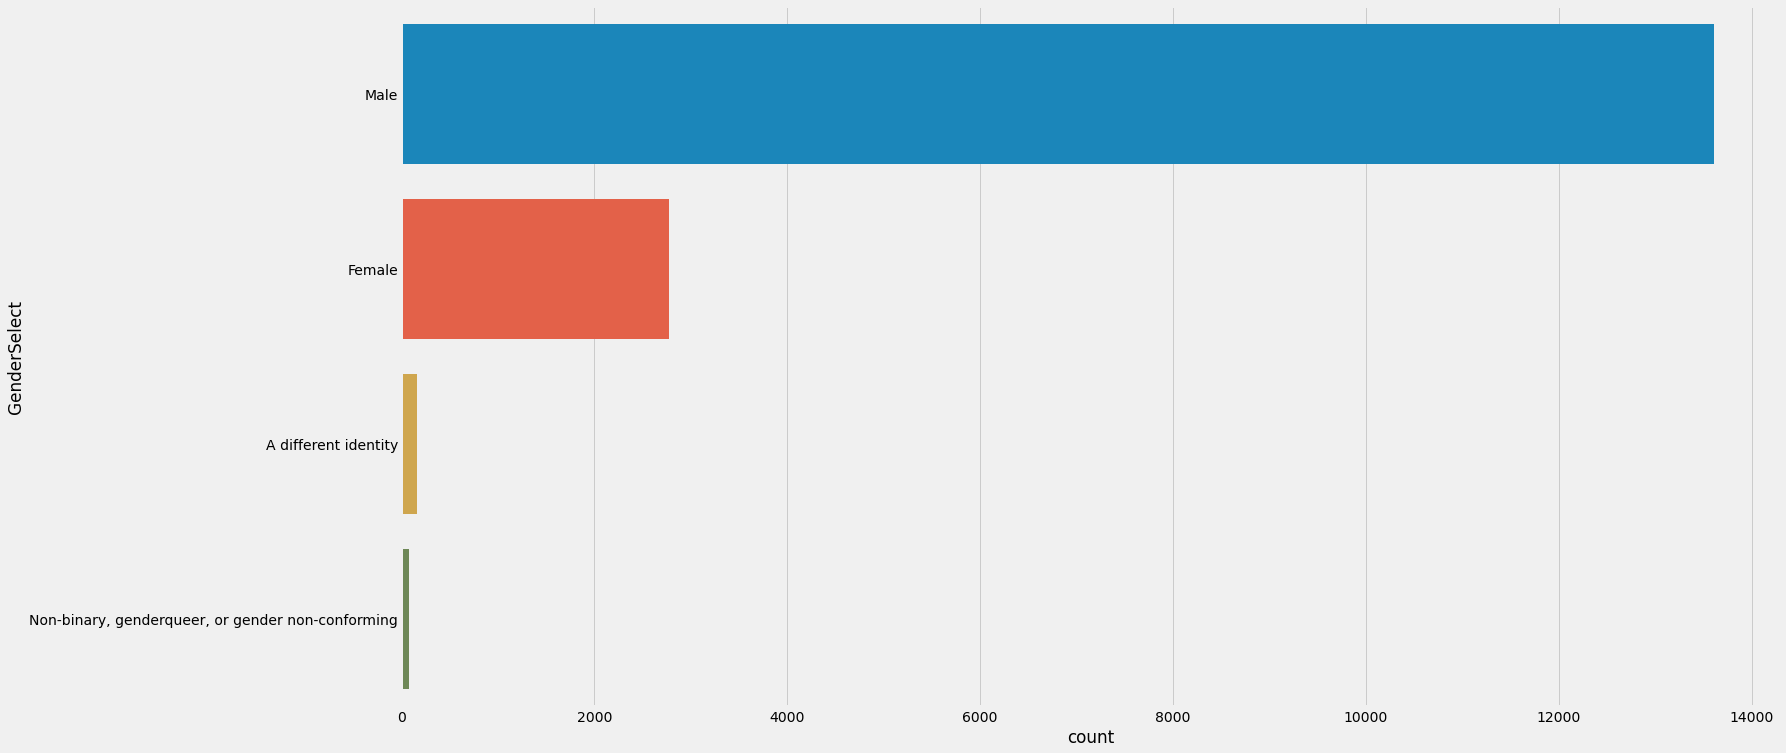

In [14]:
plt.subplots(figsize=(22,12))
sns.countplot(y=response['GenderSelect'], 
              order=response['GenderSelect'].value_counts().index)
plt.show()

The graph clearly shows that there are a lot more male respondents as compared to female. It seems that Ladies were either busy with their coding, or ladies don't code...:p. Just Kidding.

# Respondents By Country

/home/user/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



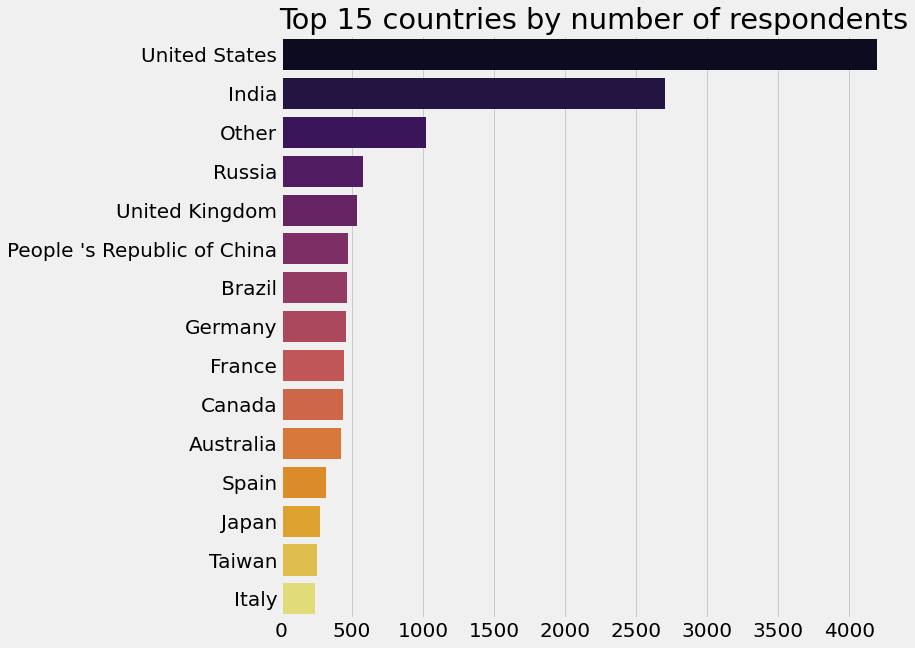

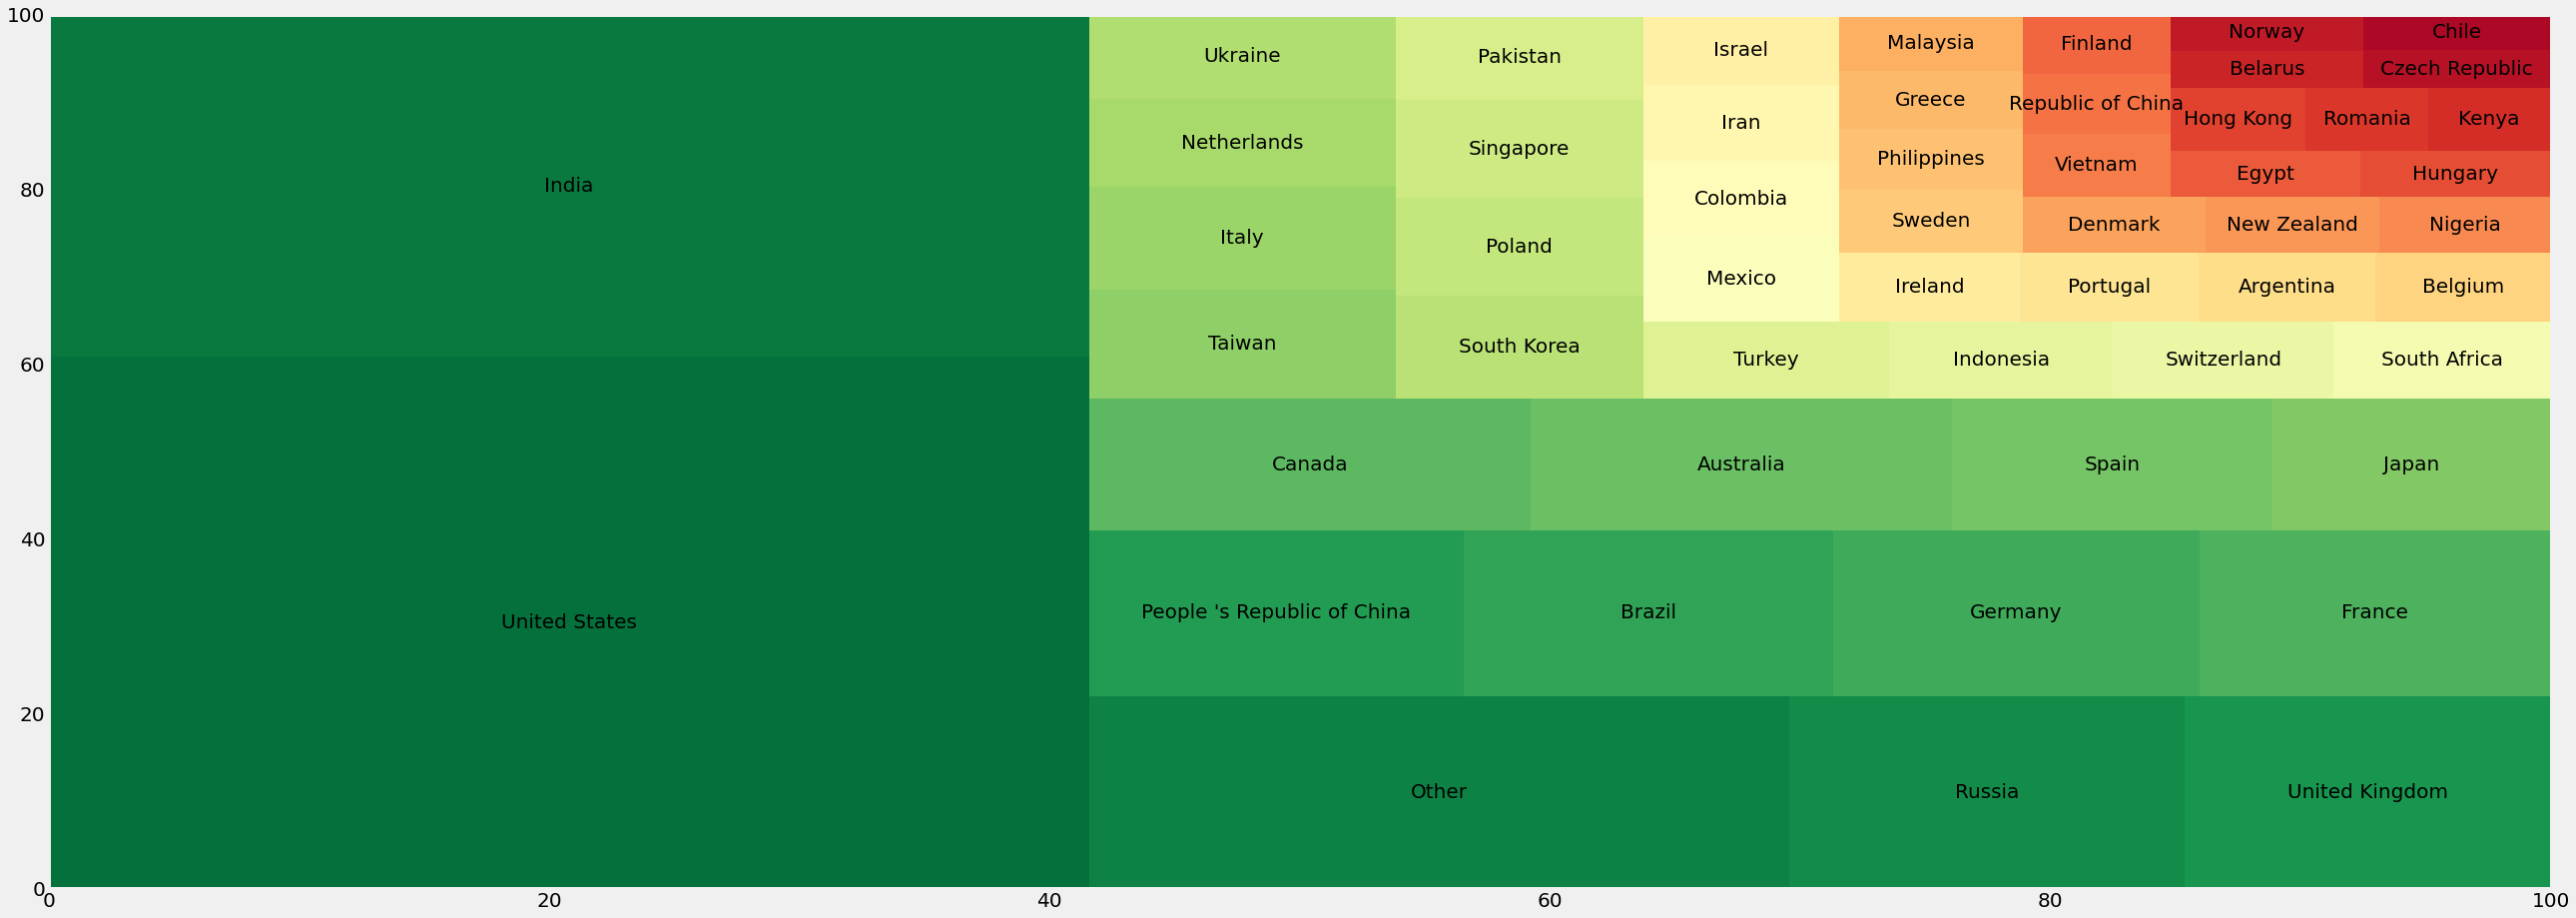

In [19]:
resp_coun=response['Country'].value_counts()[:15].to_frame()
sns.barplot(resp_coun['Country'], resp_coun.index, palette='inferno')
plt.title('Top 15 countries by number of respondents')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

tree=response['Country'].value_counts().to_frame()
squarify.plot(sizes=tree['Country'].values, 
              label=tree.index, 
              color=sns.color_palette('RdYlGn_r', 52))
plt.rcParams.update({'font.size':20})
fig=plt.gcf()
fig.set_size_inches(40, 15)
plt.show()

**USA and India**, constitute maximum respondents, about 1/3 of the total. Similarly Chile has the lowest number of respondents. Is this graph sufficient enough to say that majority of Kaggle Users are from India and USA. I don't think so, as the total users on Kaggle are more than 1 million while the number of respondents are only 16k.

# Compensation

Data csientists are one of the most highest payed individuals. Lets check what the surveyors say

In [31]:
response['CompensationAmount']=response['CompensationAmount'].str.replace(',','')
response['CompensationAmount']=response['CompensationAmount'].str.replace('-','')
rates=pd.read_csv('Data/conversionRates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)
salary=response[['CompensationAmount', 'CompensationCurrency', 
                 'GenderSelect', 'Country', 
                 'CurrentJobTitleSelect']].dropna()
salary=salary.merge(rates, 
                    left_on='CompensationCurrency', 
                    right_on='originCountry', how='left')
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']
print('Maximum Salary in USD $', salary['Salary'].dropna().astype(int).max())
print('Minimum Salary in USD $', salary['Salary'].dropna().astype(int).min())
print('Median Salary in USD $', salary['Salary'].dropna().astype(int).median())

Maximum Salary in USD $ 28297400000
Minimum Salary in USD $ 0
Median Salary in USD $ 53812.0


/home/user/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



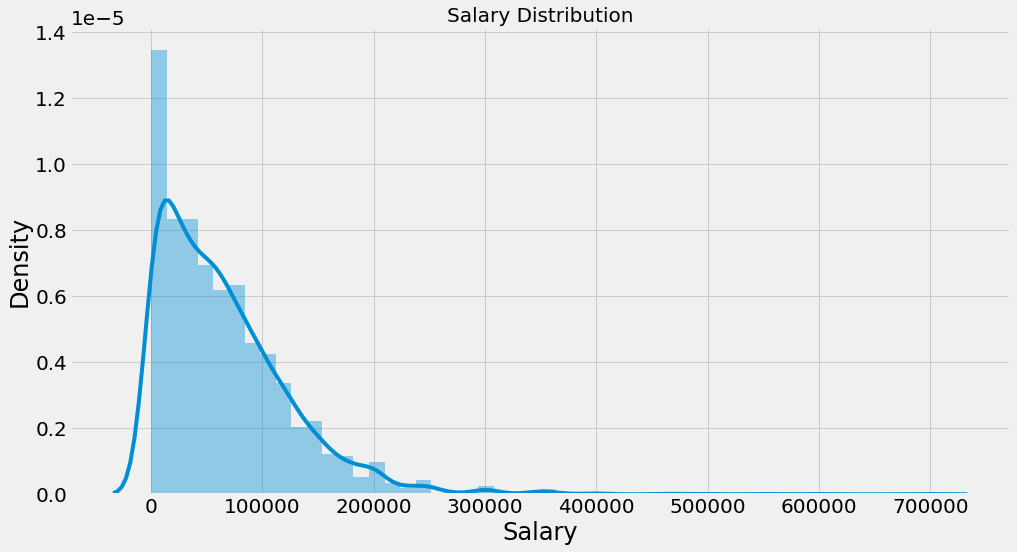

In [33]:
plt.subplots(figsize=(15, 8))
salary=salary[salary['Salary'] < 1000000]
sns.distplot(salary['Salary'])
plt.title('Salary Distribution', size=20)
plt.show()

# Compensation by Country

/home/user/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



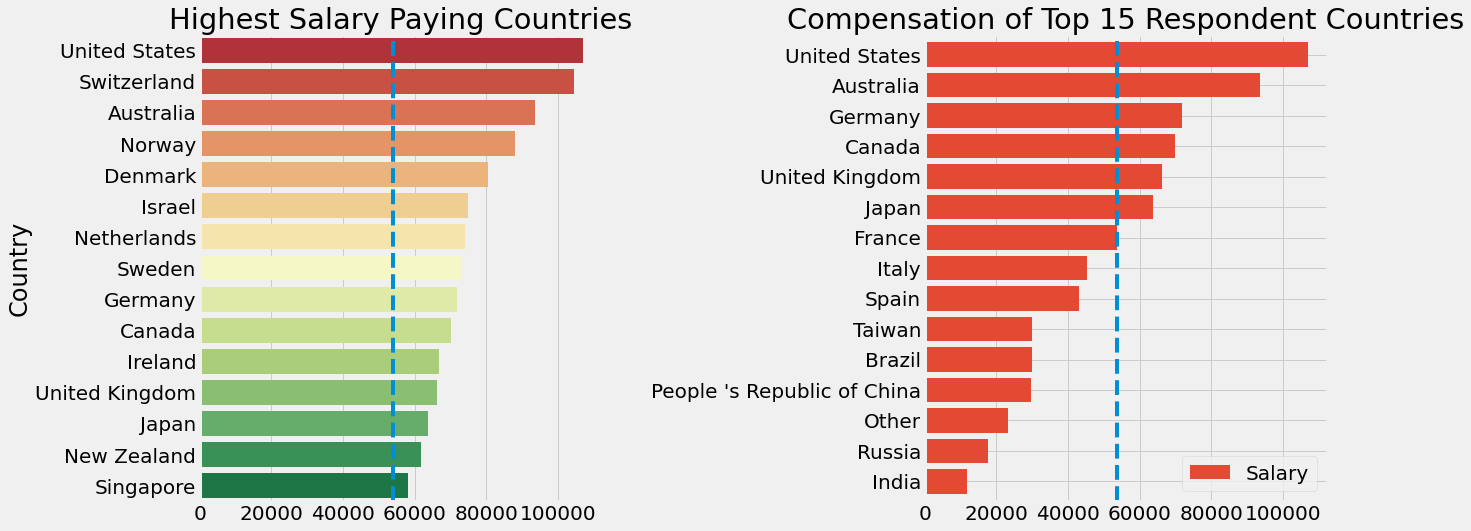

In [35]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
sal_coun=salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot('Salary', sal_coun.index, data=sal_coun, palette='RdYlGn', ax=ax[0])
ax[0].axvline(salary['Salary'].median(), linestyle='dashed')
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')
max_coun=salary.groupby('Country')['Salary'].median().to_frame()
max_coun=max_coun[max_coun.index.isin(resp_coun.index)]
max_coun.sort_values(by='Salary', ascending=True).plot.barh(width=0.8, 
                                                            ax=ax[1], 
                                                            color=sns.color_palette('RdYlGn'))
ax[1].axvline(salary['Salary'].median(), linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

The left graph shows the Top 15 high median salary paying countries. It is good to see that these countries provide salary more than the median salary of the complete dataset. Similarly,the right graph shows median salary of the Top 15 Countries by respondents. The most shocking graph is for India. India has the 2nd highest respondents, but still it has the lowest median salary in the graph. Individuals in USA have a salary almost 10 times more than their counterparts in India. What may be the reason?? Are IT professionals in India really underpaid?? We will check that later.

# Salary By gender

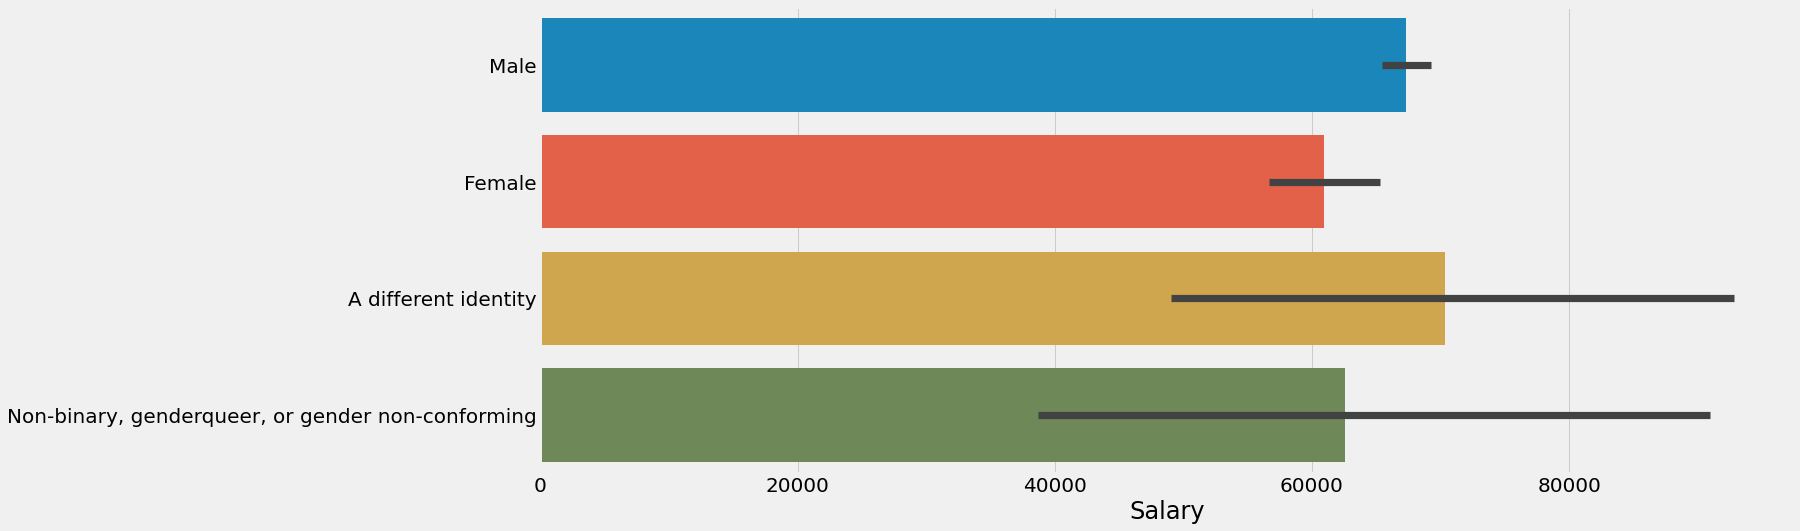

In [37]:
plt.subplots(figsize=(20, 8))
sns.barplot(y='GenderSelect', x='Salary', data=salary)
plt.ylabel('')
plt.show()

The salary for males look to be high as compared to others.

# Age

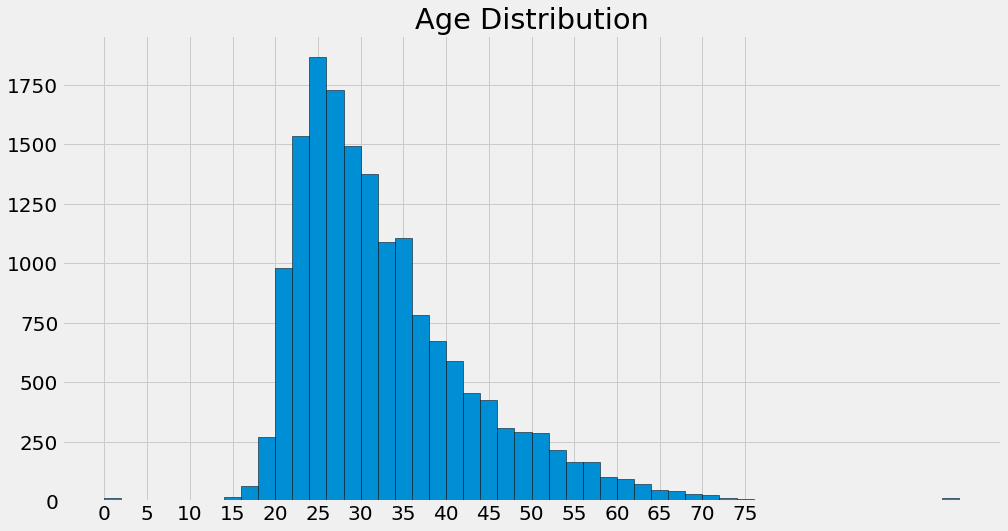

In [39]:
plt.subplots(figsize=(15, 8))
response['Age'].hist(bins=50, edgecolor='black')
plt.xticks(list(range(0, 80, 5)))
plt.title('Age Distribution')
plt.show()

The respondents are young people with majority og them being in the bracket if 25-35.

# Profession & Major

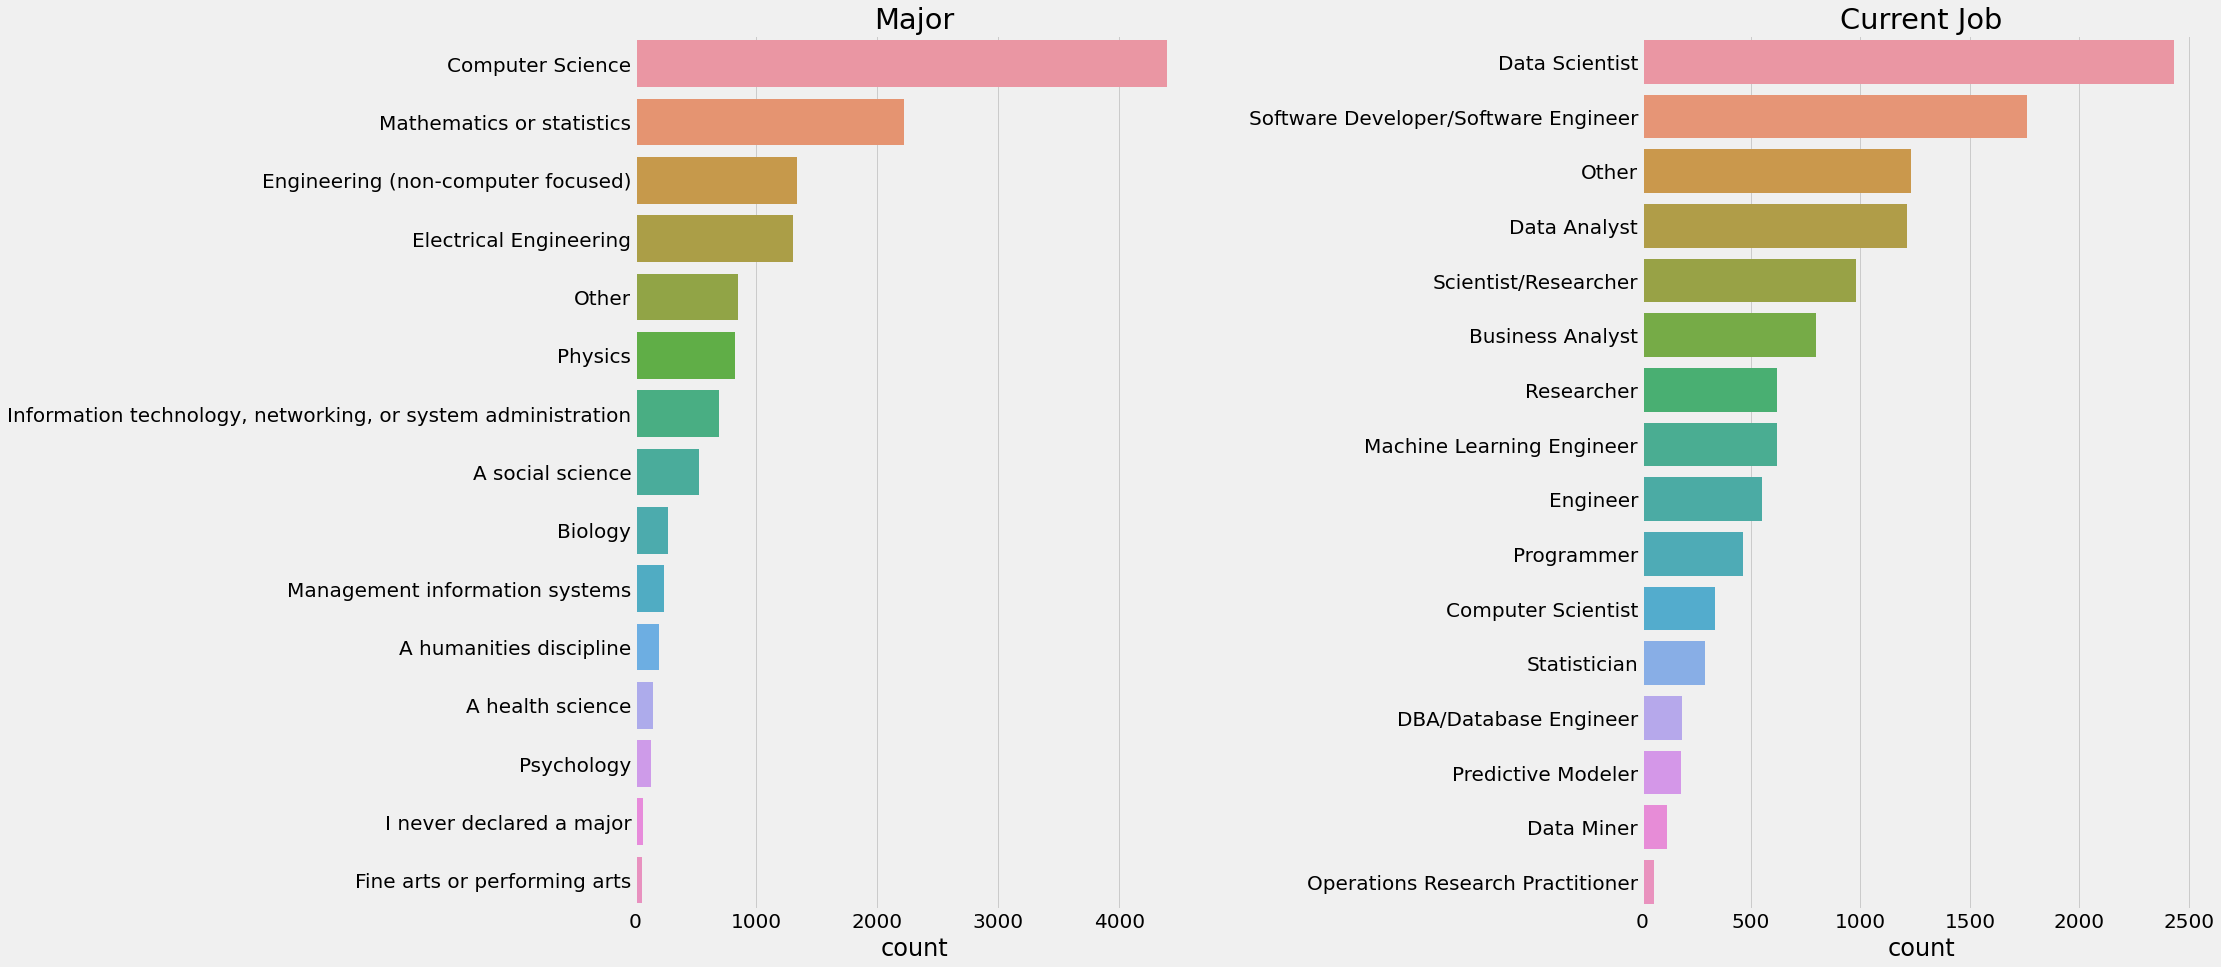

In [41]:
f, ax=plt.subplots(1, 2, figsize=(25, 15))
sns.countplot(y=response['MajorSelect'], ax=ax[0], 
              order=response['MajorSelect'].value_counts().index)
ax[0].set_title('Major')
ax[0].set_ylabel('')

sns.countplot(y=response['CurrentJobTitleSelect'], ax=ax[1], 
              order=response['CurrentJobTitleSelect'].value_counts().index)
ax[1].set_title('Current Job')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

Data Science and Machine Learning is used in almost every industry. This is evident from the left graph,as people from different areas of interest like Physics, Biology, etc are taking it up for better understanding of the data. The right side graph shows the Current Job of the respondents. A major portion of the respondents are Dats Scientists. But as it is survey data, we know that there may be many ambigious responses. Later on we will check are these respondents real datas-scientists or self proclaimed data-scientists.

# Compensation By Job Title

/home/user/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



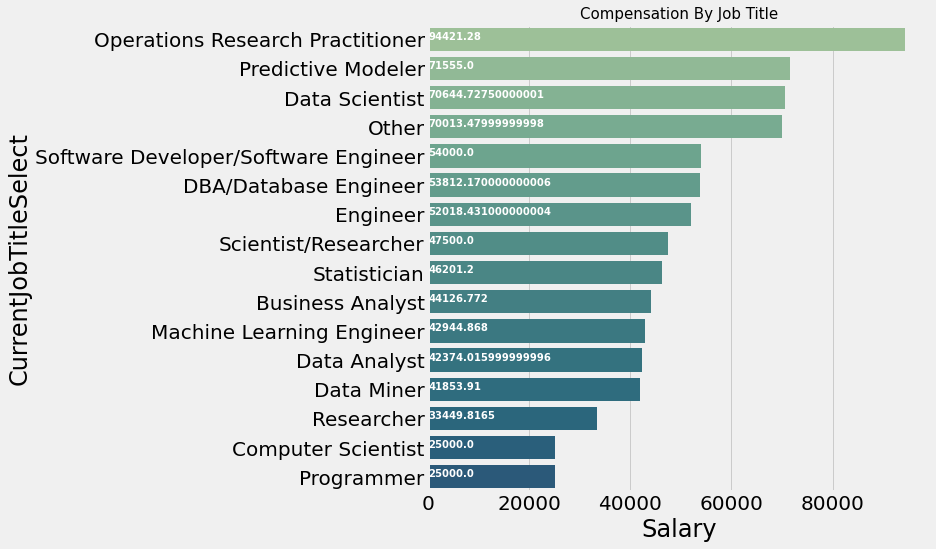

In [46]:
sal_job=salary.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary', ascending=False)
ax=sns.barplot(sal_job.Salary, sal_job.index, palette=sns.color_palette('crest', 20))
plt.title('Compensation By Job Title', size=15)
for i, v in enumerate(sal_job.Salary):
    ax.text(.5, i, v, fontsize=10, color='white', weight='bold')
fig=plt.gcf()
fig.set_size_inches(8, 8)
plt.show()

Operations Research Practitioner has the highest median salary followed by Predictive Modeler and Data Scientist. Computer Scientist and Programmers have the lowest compensation.

# Machine Learning

/home/user/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/user/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



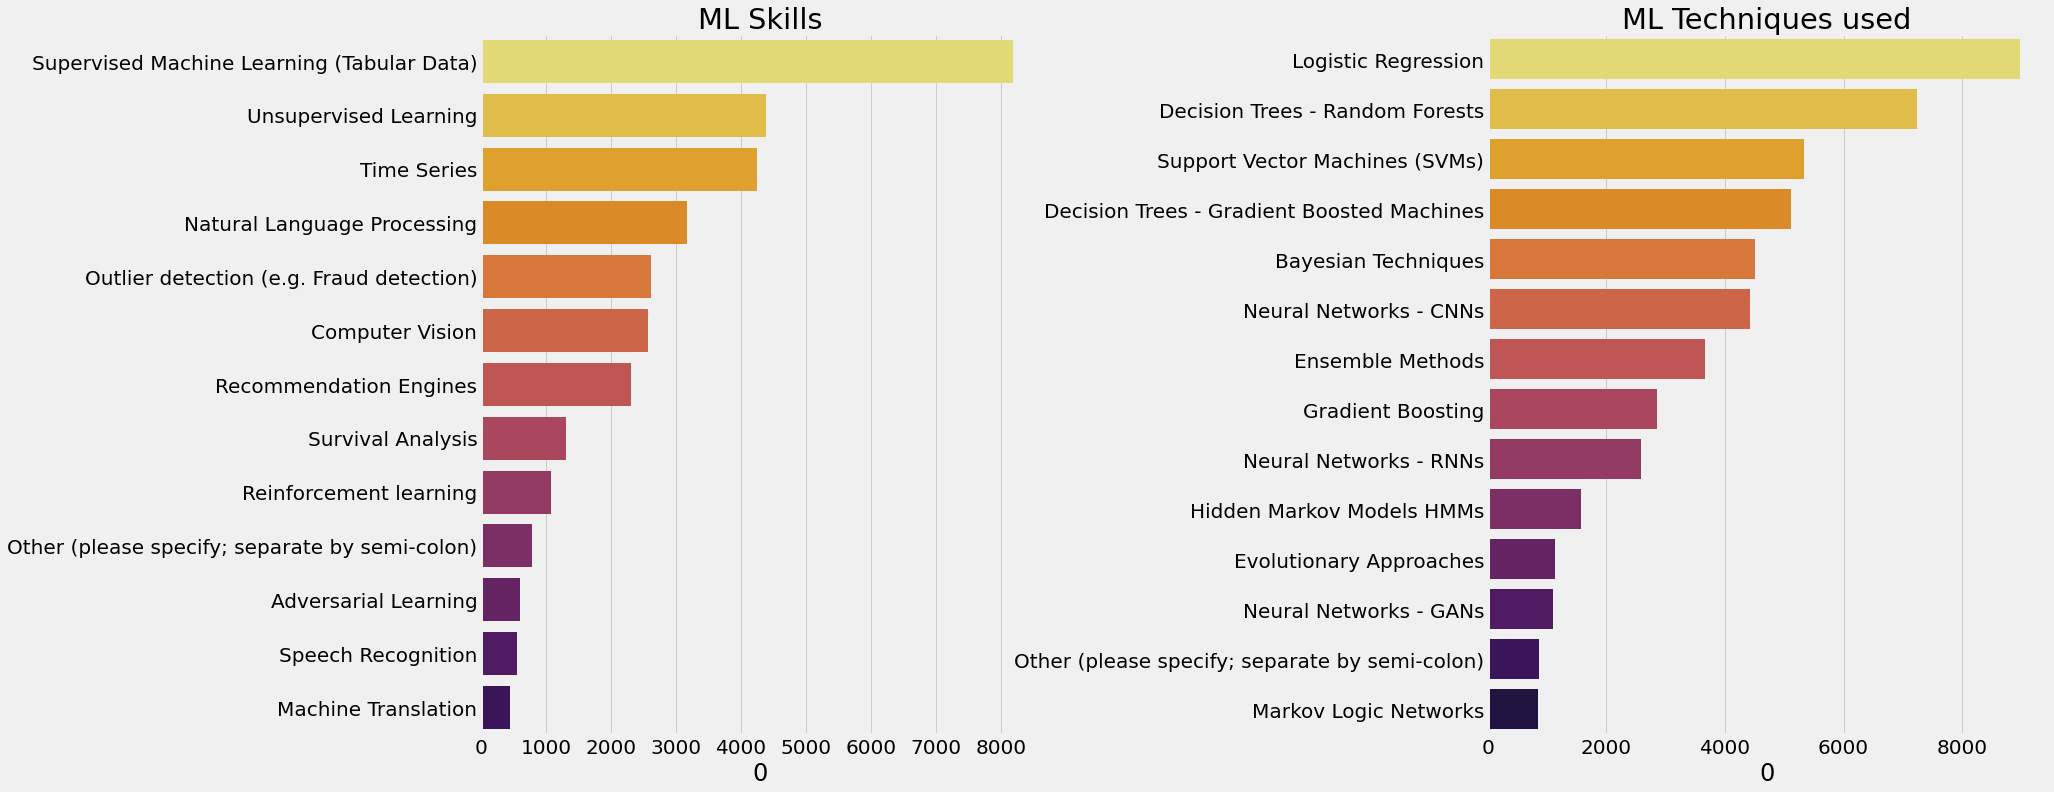

In [48]:
f, ax = plt.subplots(1, 2, figsize=(25, 12))
skills=response['MLSkillsSelect'].str.split(',')
skills_set = []
for i in skills.dropna():
    skills_set.extend(i)
plt1=pd.Series(skills_set).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0], plt1.index, ax=ax[0], palette=sns.color_palette('inferno_r', 15))
ax[0].set_title('ML Skills')

tech=response['MLTechniquesSelect'].str.split(',')
techniques=[]
for i in tech.dropna():
    techniques.extend(i)
plt1=pd.Series(techniques).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0], plt1.index, ax=ax[1], palette=sns.color_palette('inferno_r', 15))
ax[1].set_title('ML Techniques used')
plt.subplots_adjust(wspace=0.8)
plt.show()

It is evident that most respondents are working with Supervised Learning, and Logistic Regression being the favorite among them. There is no algorithm that is the best for all classification domains. A way to select one algorithm for a particular domain is by means of crossvalidation on the training data.

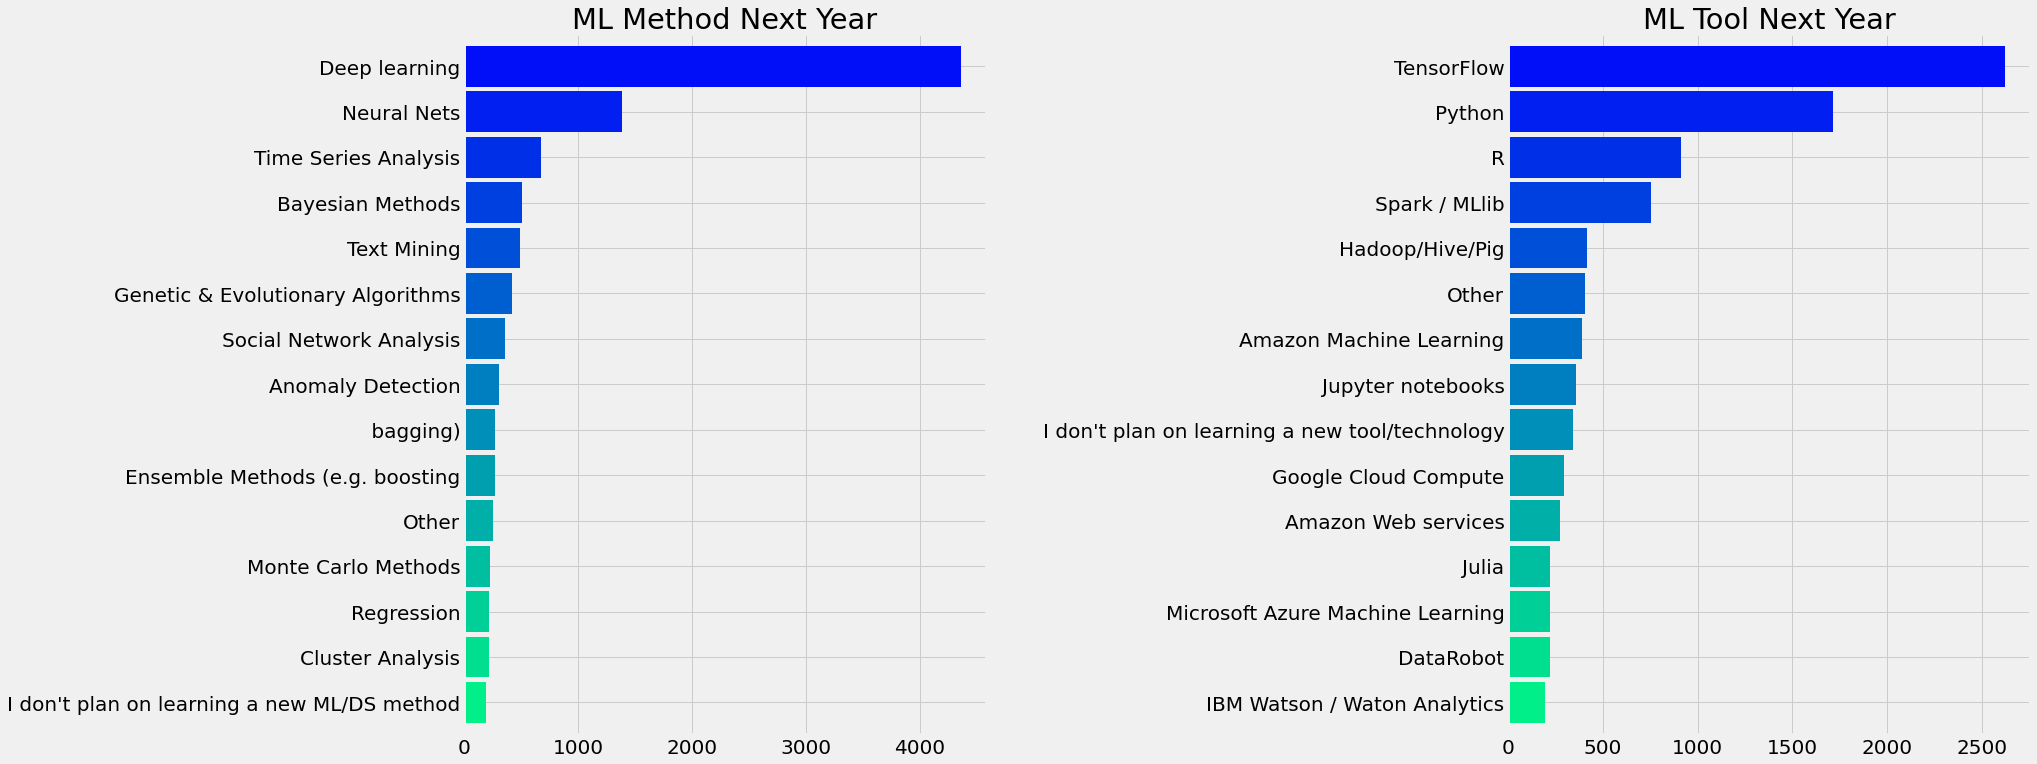

In [54]:
f, ax=plt.subplots(1, 2, figsize=(25, 12))
ml_nxt=response['MLMethodNextYearSelect'].str.split(',')
nxt_year=[]
for i in ml_nxt.dropna():
    nxt_year.extend(i)
pd.Series(nxt_year).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9, 
                                                                              color=sns.color_palette('winter_r', 15), ax=ax[0])
tool=response['MLToolNextYearSelect'].str.split(',')
tool_nxt=[]
for i in tool.dropna():
    tool_nxt.extend(i)
pd.Series(tool_nxt).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('winter_r', 15), ax=ax[1])
plt.subplots_adjust(wspace=1)
ax[0].set_title('ML Method Next Year')
ax[1].set_title('ML Tool Next Year')
plt.show()

It is evident that the next year is going to see a jump in number of **Deep Learning** practitioners. Deep Learning and neural nets or in short AI is a favorite hot-topic for the next Year. Also in terms of Tools, Python is preffered more over R. BigData tools like Spark and Hadoop also have a good share in the coming years.

# Best Platforms to learn

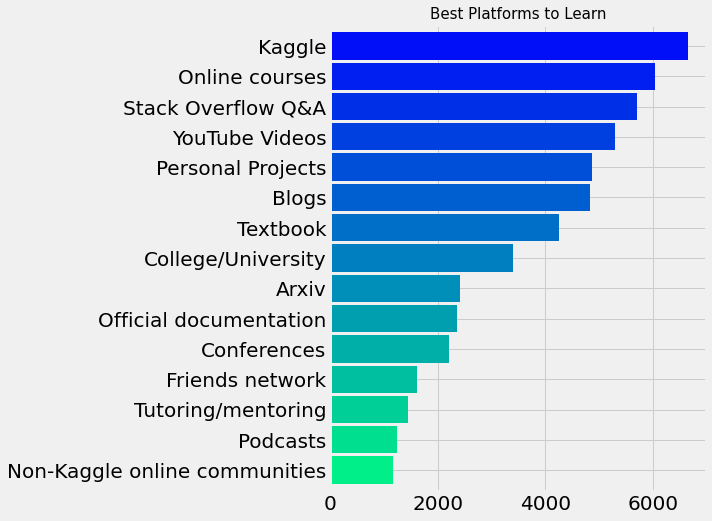

In [57]:
plt.subplots(figsize=(6, 8))
learn=response['LearningPlatformSelect'].str.split(',')
platform=[]
for i in learn.dropna():
    platform.extend(i)
pd.Series(platform).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('winter_r', 15))
plt.title('Best Platforms to Learn', size=15)
plt.show()

My personal favorite Kaggle, is the most sought after source for learning Data Science, as it has notebooks from really experienced Data Scientists. The next choice is Online Courses i.e MOOC's. Platforms like coursera,udacity provide interactive videos and exercises for learning. Similary Youtube channels like Siraj Raval and others offer a free medium to study. These all medium are above than Textbooks. The reason maybe that textbooks often have limited content, or people are more fond of watching videos and learning.

# Hardware Used

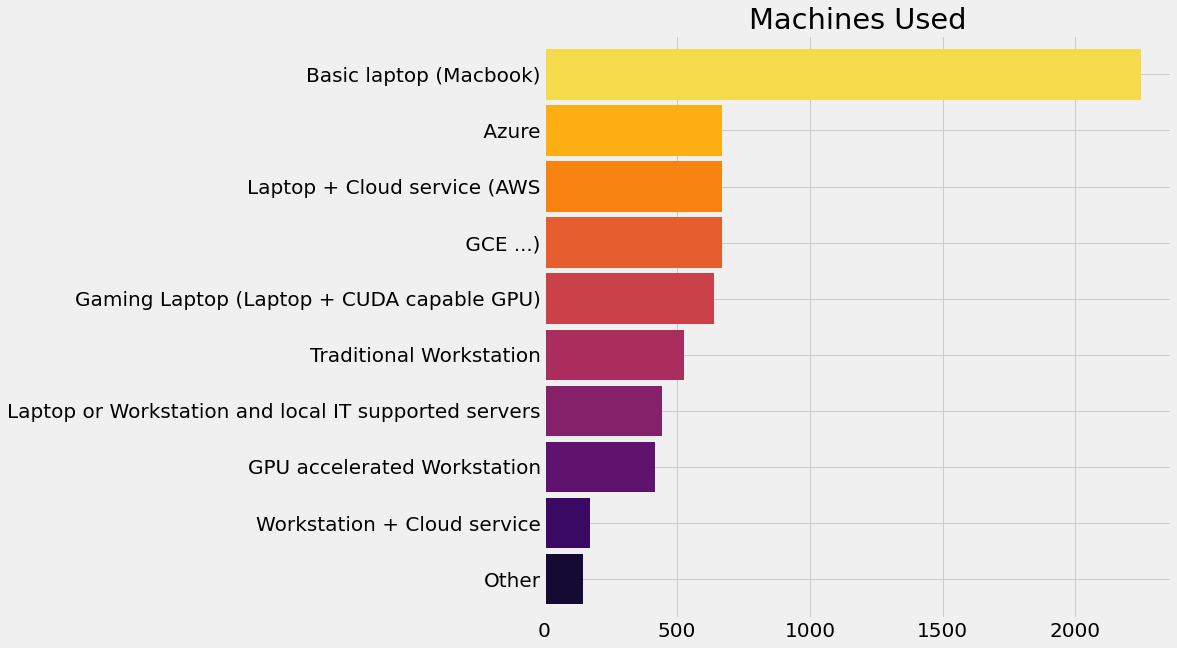

In [59]:
plt.subplots(figsize=(10, 10))
hard=response['HardwarePersonalProjectsSelect'].str.split(',')
hardware=[]
for i in hard.dropna():
    hardware.extend(i)
pd.Series(hardware).value_counts().sort_values(ascending=True).plot.barh(width=0.9, 
                                                                         color=sns.color_palette('inferno', 10))
plt.title('Machines Used')
plt.show()

Since majority of the respondents fall in the category below 25, which is where a majority of students fall under, thus a basic Laptop is the most commonly used machine for work.

# Where Do I get Datasets From?

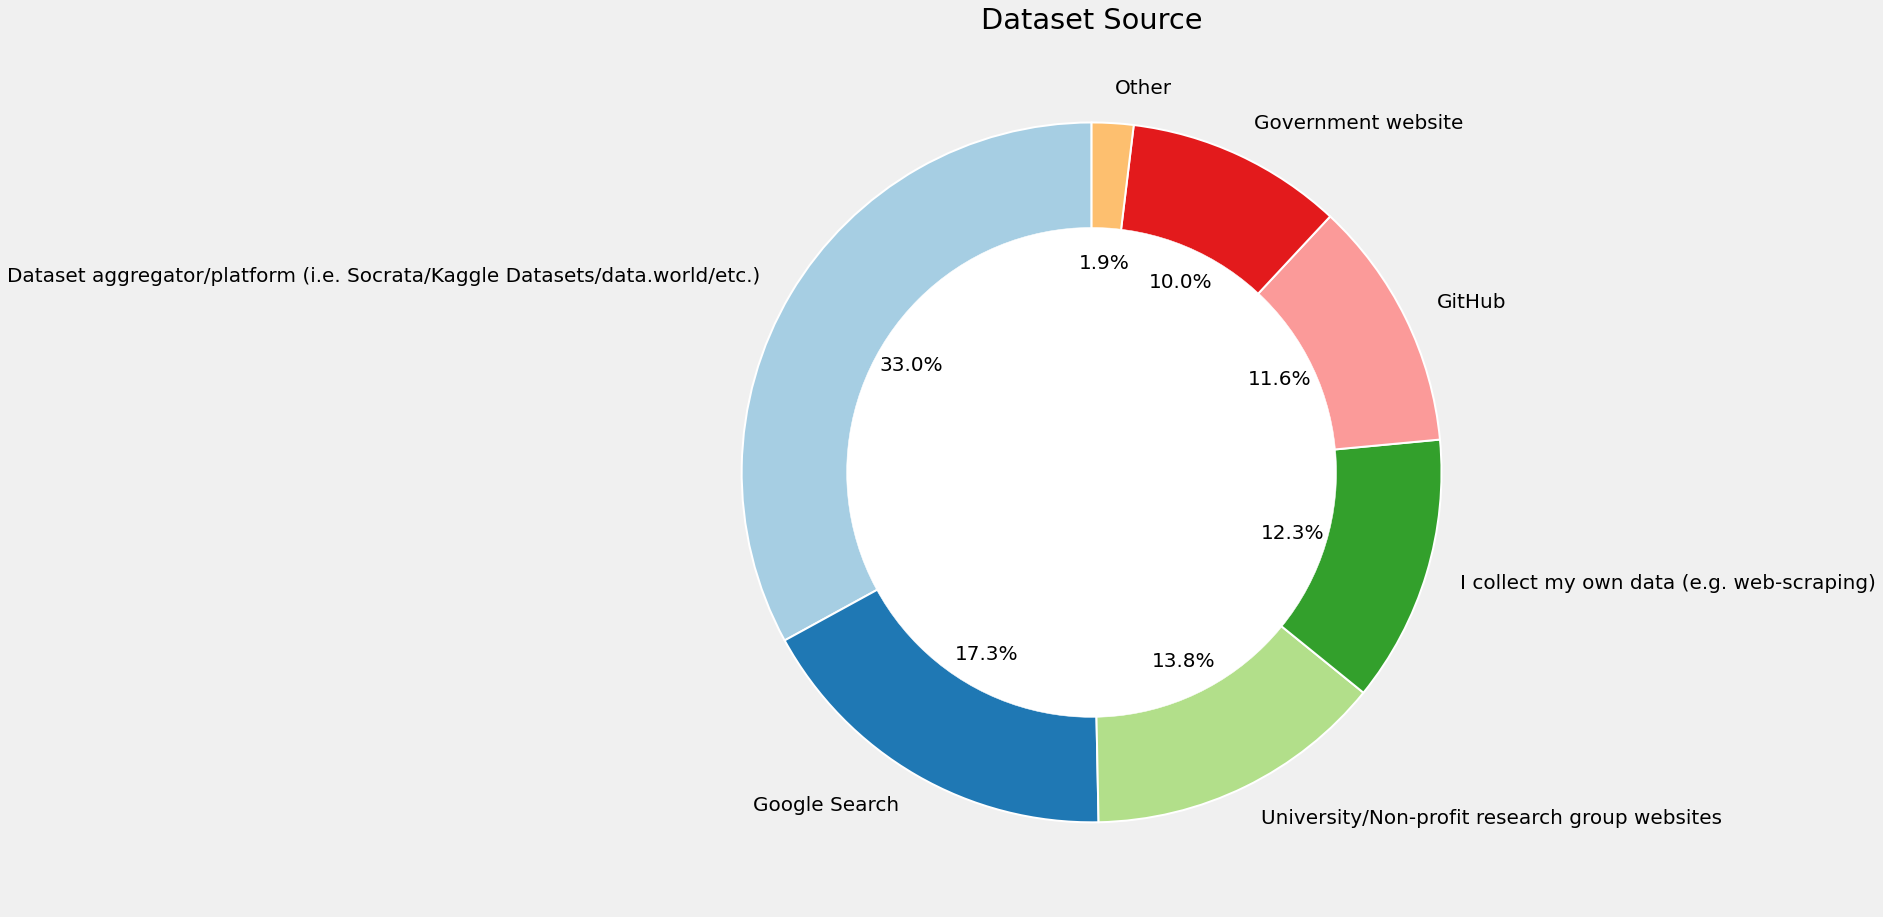

In [60]:
plt.subplots(figsize=(15, 15))
data=response['PublicDatasetsSelect'].str.split(',')
dataset = []
for i in data.dropna():
    dataset.extend(i)
pd.Series(dataset).value_counts().plot.pie(autopct='%1.1f%%', 
                                           colors=sns.color_palette('Paired', 10), 
                                           startangle=90, 
                                           wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.title('Dataset Source')
my_circle=plt.Circle((0, 0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

With hundreds of Dataset available, Kaggle is most sought after source for datasets.

# Code Sharing

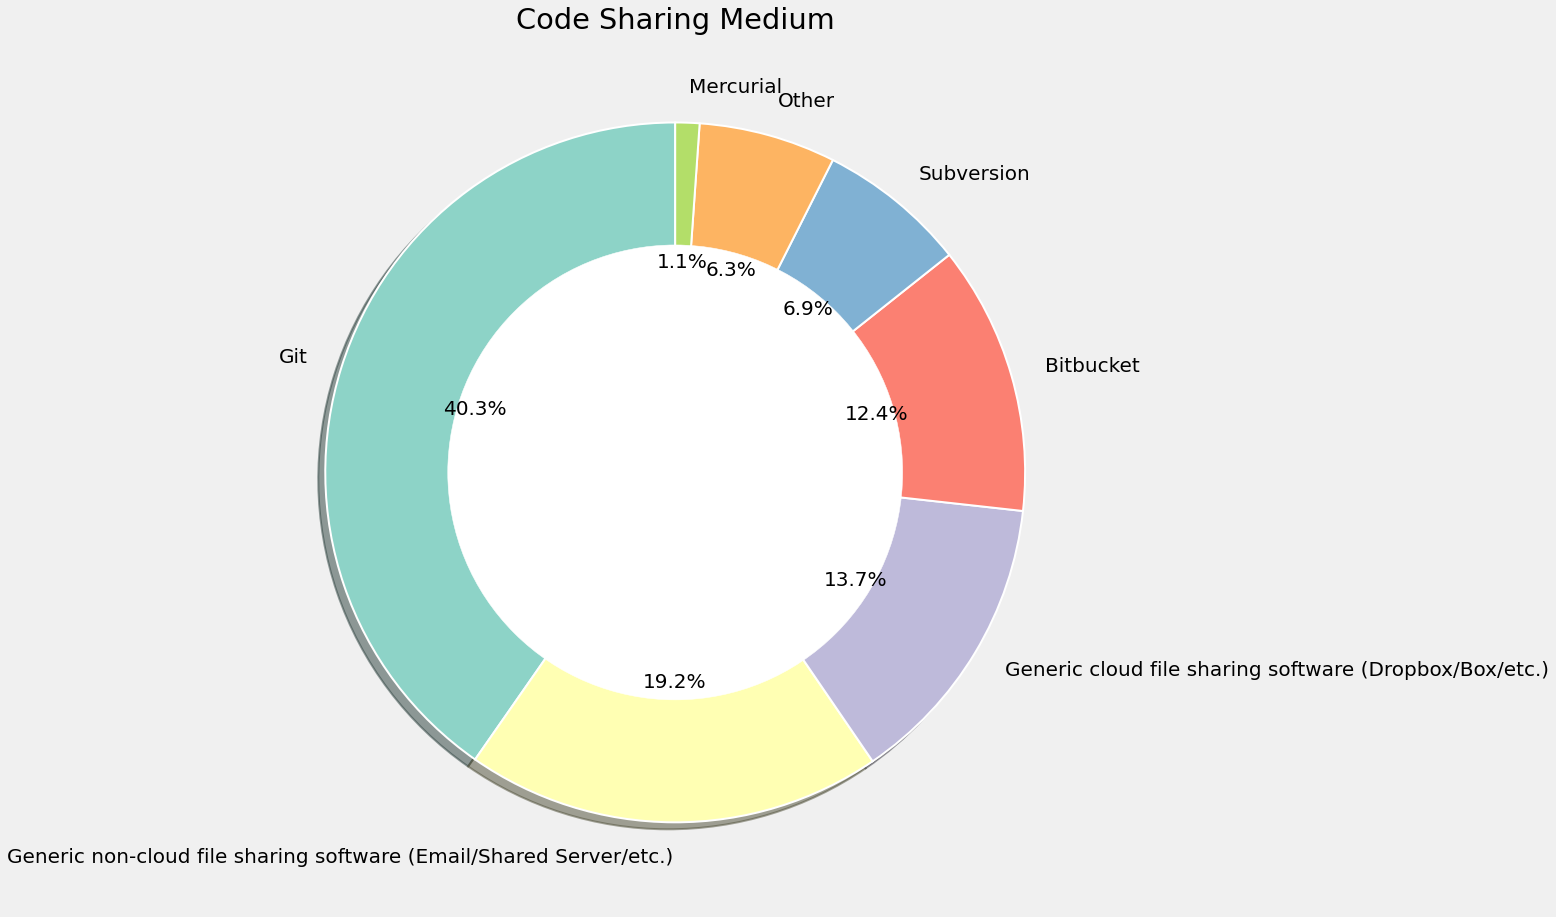

In [62]:
plt.subplots(figsize=(15, 15))
code=response['WorkCodeSharing'].str.split(',')
code_share=[]
for i in code.dropna():
    code_share.extend(i)
pd.Series(code_share).value_counts().plot.pie(autopct='%1.1f%%', 
                                              shadow=True, 
                                              colors=sns.color_palette('Set3', 10),
                                              startangle=90, 
                                              wedgeprops={'linewidth':2, 'edgecolor':'white'})
plt.title('Code Sharing Medium')
my_circle=plt.Circle((0, 0), 0.65, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

Github is the most used platform for Code and project sharing. The advantages of using github are:

1)Version control your projects;

2)Explore other's projects on Github, get inspired code more, or contribute to their project;

3)Collaborate with others, by letting other people contribute to your projects or you contributing to other's projects, and many more.

# Challenges in Data Science

/home/user/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



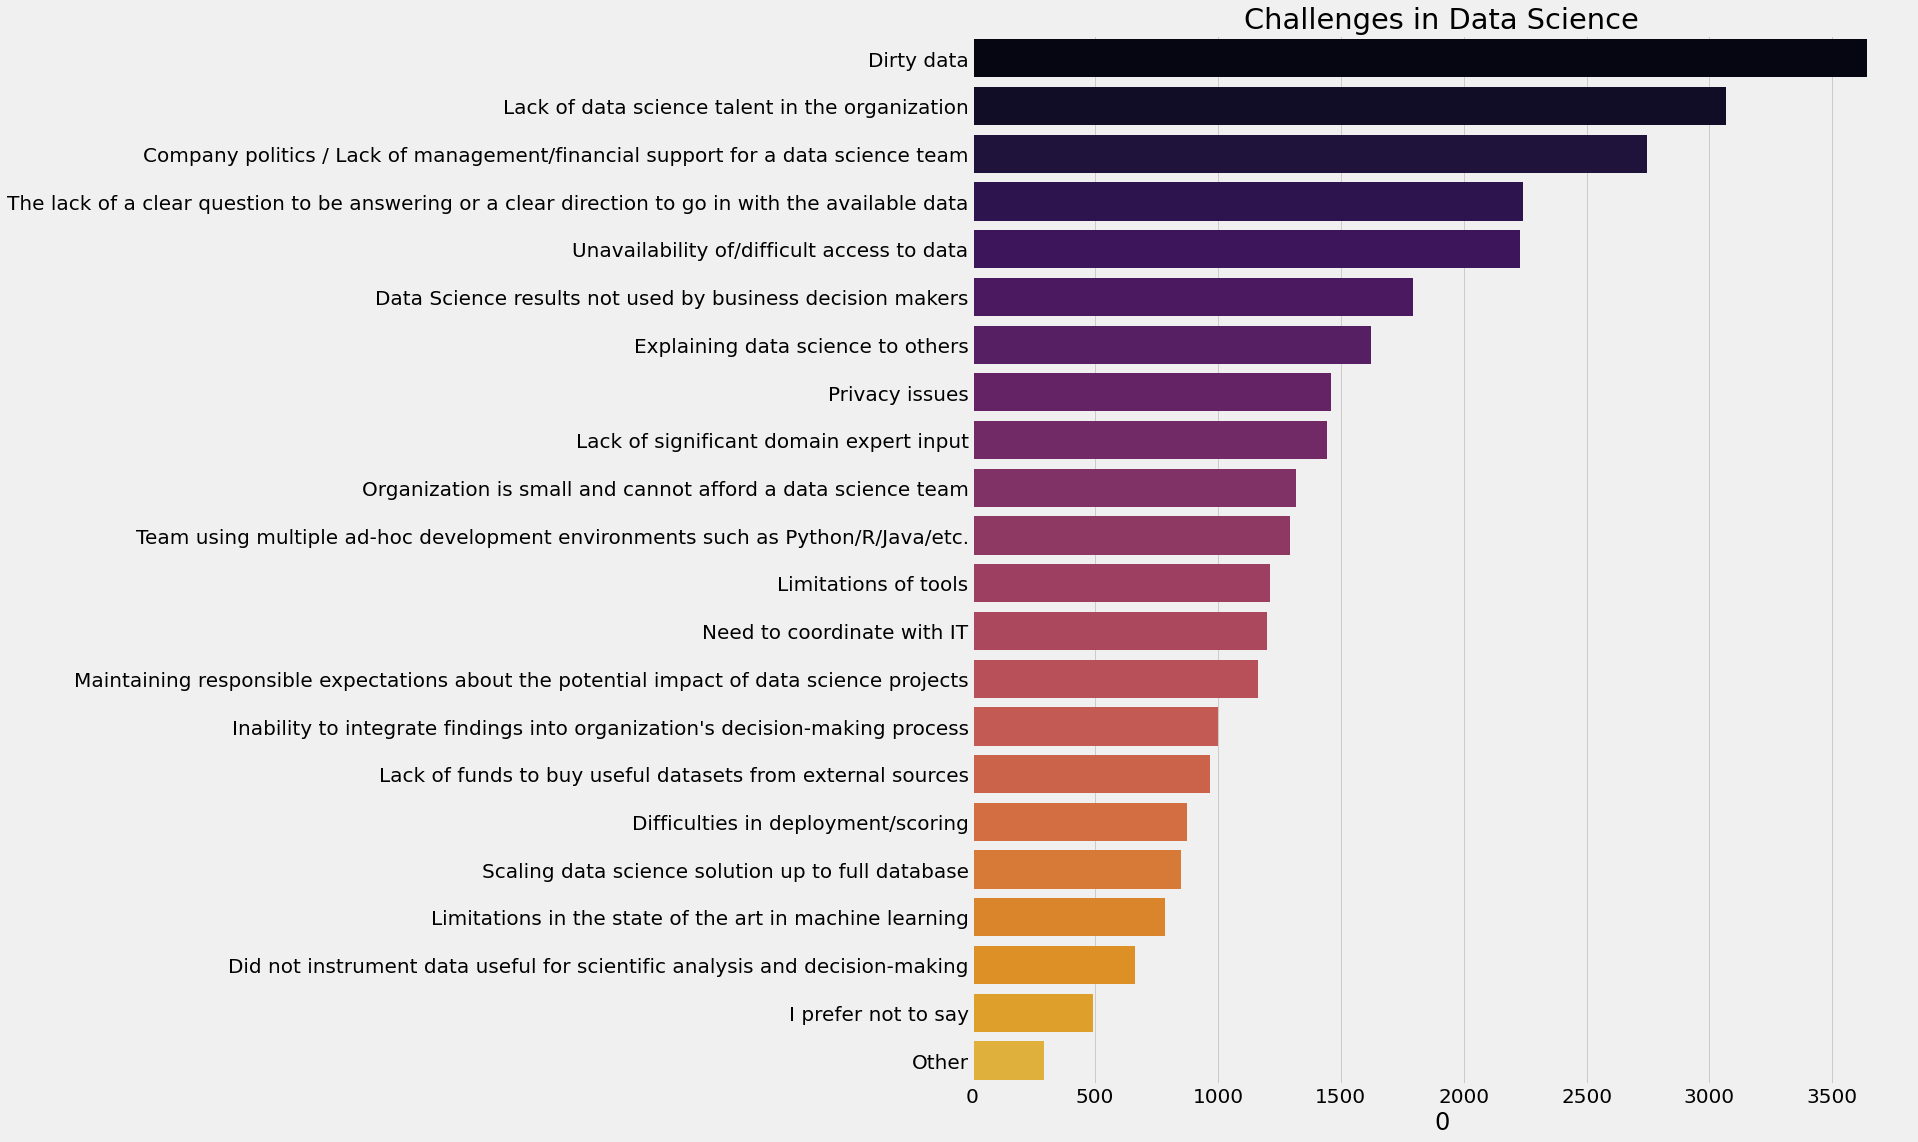

In [66]:
plt.subplots(figsize=(15, 18))
challenge=response['WorkChallengesSelect'].str.split(',')
challenges=[]
for i in challenge.dropna():
    challenges.extend(i)
plt1=pd.Series(challenges).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0], plt1.index, palette=sns.color_palette('inferno', 25))
plt.title('Challenges in Data Science')
plt.show()

The main challenge in Data Science is **getting the proper Data**. The graph clearly shows that dirty data is the biggest challenge. Now what is dirty data?? Dirty data is a database reord that contains errors. Dirty data can be caused by a number of factors including duplicate records, incomplete or outdated data, and the improper parsing of record fields from disparate systems. Luckily Kaggle datasets are pretty clean and standardised.

Some other major challenges are the **Lack of Data Sciene and Machine Learing talent, difficulty in getting data and lack of tools**. Thats why Data Science is the sexiest job in 21st century. With the increasing amount of data, this demand will substantially grow.

# Job Satisfaction

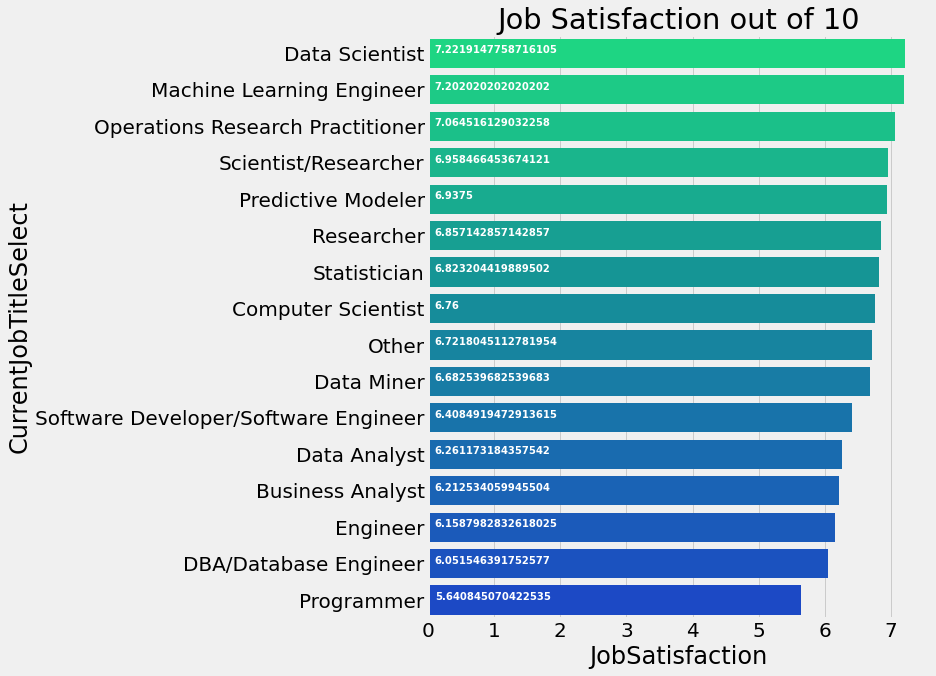

In [67]:
satisfy=response.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10', 
                                    '1 - Highly Dissatisfied':'1', 
                                    'I prefer not to share':np.NaN}, inplace=True)
satisfy.dropna(subset=['JobSatisfaction'], inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job=satisfy.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(ascending=False).to_frame()
ax=sns.barplot(y=satisfy_job.index,
               x=satisfy_job.JobSatisfaction, 
               palette=sns.color_palette('winter_r', 20))
fig=plt.gcf()
fig.set_size_inches(8, 10)
for i, v in enumerate(satisfy_job.JobSatisfaction):
    ax.text(.1, i, v, fontsize=10, color='white', weight='bold')
plt.title('Job Satisfaction out of 10')
plt.show()

Data Scientists and Machine Learning engineers are the most satisfied people(who won't be happy with so much money), while Programmers have the lowest job satisfaction. But the thing to note here is that even if Computer Scientists have a lower salary than Programmers, still they have a good job satisfaction level than programmers. Thus Salary is not the only criteria or job satisfaction.

# Job Satisfactions By Country

In [75]:
satisfy=response.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10', 
                                    '1 - Highly Dissatisfied':'1', 
                                    'I prefer not to share':np.NaN}, inplace=True)
satisfy.dropna(subset=['JobSatisfaction'], inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job=satisfy.groupby(['Country'])['JobSatisfaction'].mean().sort_values(ascending=True).to_frame()

data = [dict(
        type='choropleth',
        autocolorscale=False,
        colorscale='Viridis',
        reversescale=True,
        showscale=True,
        locations=satisfy_job.index,
        z=satisfy_job['JobSatisfaction'],
        locationmode='country names',
        text=satisfy_job['JobSatisfaction'],
        marker=dict(
                    line=dict(color='rgb(200,200,200)', width=0.5)),
                    colorbar=dict(autotick=True, tickprefix='',
                                  title='Satisfaction')
                    )
       ]
layout=dict(
    title='Job Satisfaction By Country',
    geo=dict(
            showframe=True,
            showocean=True,
            oceancolor='rgb(0, 0, 255)',
            projection=dict(
                            type='chloropleth',
            ),
            lonaxis=dict(
                        showgrid=False,
                        gridcolor='rgb(102, 102, 102)'
                        )
            ),
            lataxis=dict(
                        showgrid=False,
                        gridcolor='rgb(102, 102, 102)'
                        )
           )
fig=dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2010')

The average Job Satisfaction level is between **6-7.5** for most of the countries. It is lower in Japan(where people work for about 14 hours) and China. It is higher in come countries like Sweden and Mexico.